# Read Light Curves

This notebook reads the light curve data from the `1_Light_Curves` directory using `h5py` and visualizes the results.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
time, flux_white, flux_err_white, flux, flux_err, wl, flux_white_raw, flux_err_white_raw, flux_raw, flux_err_raw = np.load('data/WASP43b_MIRI.npz').values()

In [3]:
# # Plot Spectral Light Curves for a few wavelengths
# plt.figure(figsize=(12, 8))

# # Plot first, middle, and last wavelength channels
# indices = [0, len(wavelength)//2, len(wavelength)-1]

# for i in indices:
#     plt.plot(time, flux[i], '.', alpha=0.5, label=f'{wavelength[i]:.2f} $\mu$m')

# plt.title('Spectral Light Curves')
# plt.xlabel('Time (BJD)')
# plt.ylabel('Flux')
# plt.legend()
# plt.show()

In [4]:
# Star Parameters (Source: S5_WASP-43b_fitpar_starry_white.epf / Nature Astronomy 2024)
m_star = 0.692
m_planet = 2.034 * 1.898e27 / 1.98847e30
R_sun = 6.957e8  # Radius of Sun in meters
R_J = 6.9911e7  # Radius of Jupiter in meters
fp = 6500e-6

r_star = 0.667
r_planet = 1.049 * R_J / R_sun
A = dict(
    ydeg=1,  
    udeg=2,  
    inc=90,  
    amp=1.0, 
    r=r_star, 
    m=m_star, 
    prot=1.0, 
    u=[0.03, 0.2],  # u1, u2 from epf file
)

# Planet Parameters (WASP-43b)
porb = 0.81347406 # Period from epf file
t0_ref = 55934.29223313741 # BJD from epf file (55934 + 2400000.5)
# t0_ref = 55934 + 2400000.5

B = dict(
    ydeg=2,
    udeg=2,
    inc=82.27,  # inc from epf file
    r=r_planet,
    m=m_planet,  # Mass often negligible for light curve geometry (setting to 0 or keeping small)
    porb=porb,
    prot=porb,
    t0=t0_ref,
    u=[0.0, 0.0], # Planet LD usually ignored or 0
    Omega=0,
    ecc=0.0,
    w=90, # Argument of periastron from epf file
)  

print(f"Using T0: {B['t0']}")
print(f"Using Period: {B['porb']}")

Using T0: 55934.29223313741
Using Period: 0.81347406


In [5]:
import starry
starry.config.lazy = False
starry.config.quiet = True
pri = starry.Primary(
    starry.Map(ydeg=A["ydeg"], udeg=A["udeg"], inc=90),
    r=A["r"],
    m=A["m"],
    prot=A["prot"],
)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/opt/miniconda3/envs/spectralmap/lib/python3.9/site-packages/starry/_core/ops/limbdark/base_op.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/opt/miniconda3/envs/spectralmap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sec = starry.Secondary(
    starry.Map(ydeg=3, udeg=B["udeg"], inc=90), # this is map inclination
    r=B["r"],
    m=B["m"],
    porb=B["porb"],
    prot=B["prot"],
    t0=B["t0"], # time of transit
    inc=B["inc"],
    theta0=180,  # phase offset in degrees
)

In [7]:
from spectralmap.mapping import make_maps

maps = make_maps(mode='eclipse', pri=pri, sec=sec, map_res=30, ydegs=np.arange(2, 6, 1), lambdas=np.logspace(7, 12, 10), eclipse_depth=0.0045)

In [8]:
maps.a_lambda = 1.5
maps.b_lambda = 1e-10

In [9]:
from spectralmap.mapping import LightCurveData
data = LightCurveData(theta = time, flux=np.array([flux_white]), flux_err=np.array([flux_err_white]), wavelength=np.array([0.65]))

In [10]:
w_all, I_white, I_cov_white = maps.marginalized_maps(data)

lambda:  10%|█         | 1/10 [00:09<01:22,  9.20s/it]

lambda=10000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 42.80it/s, wl 1/1]


lambda=35938136.63804626: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda:  30%|███       | 3/10 [00:09<00:17,  2.45s/it]

lambda=129154966.50148827: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 51.56it/s, wl 1/1]


lambda=464158883.3612773: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0


lambda:  50%|█████     | 5/10 [00:09<00:06,  1.24s/it]

lambda=1668100537.2000558: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 47.75it/s, wl 1/1]


lambda=5994842503.189421: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda:  70%|███████   | 7/10 [00:09<00:02,  1.33it/s]

lambda=21544346900.318867: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 47.28it/s, wl 1/1]


lambda=77426368268.11278: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda:  90%|█████████ | 9/10 [00:09<00:00,  2.00it/s]

lambda=278255940220.7126: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda: 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


lambda=1000000000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0
Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


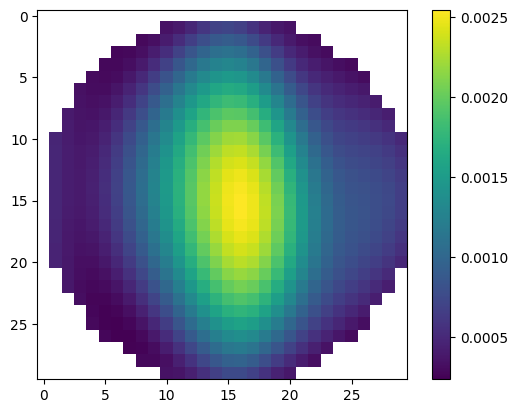

In [11]:
from spectralmap.mapping import expand_moll_values

plt.imshow(expand_moll_values(I_white, maps.moll_mask_flat).reshape(30, 30))
plt.colorbar()

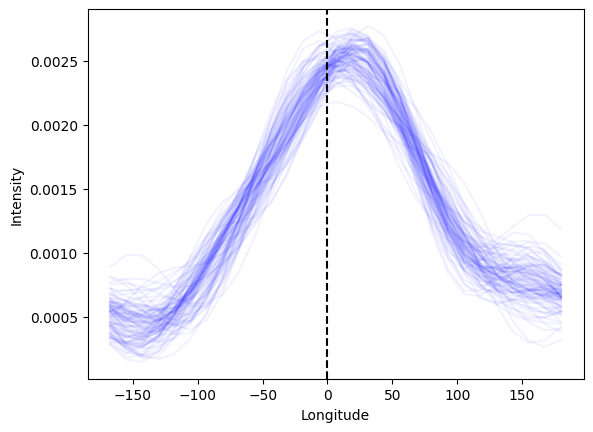

Text(0, 0.5, 'Intensity')

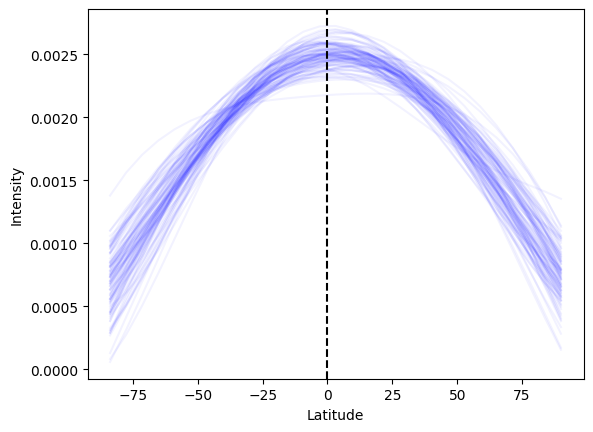

In [12]:
I_plot = I_white[0]
I_cov_plot = I_cov_white[0]
N = 100
samples = np.random.multivariate_normal(I_plot, I_cov_plot, N)

n_lat, n_lon = maps.map_res, maps.map_res
lons, lats = np.linspace(-180, 180, n_lon), np.linspace(-90, 90, n_lat)

for i in range(N):
    plt.plot(lons, expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[n_lat//2], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Longitude')
plt.ylabel('Intensity')

plt.show()
for i in range(N):
    plt.plot(lats, expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[:, n_lon//2], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Latitude')
plt.ylabel('Intensity')

In [13]:
flux.T.shape # want (wl x time)

(14, 8264)

In [29]:
from spectralmap.mapping import Map, Maps
maps = make_maps(mode='eclipse', pri=pri, sec=sec, map_res=30, ydegs=np.arange(2, 5, 1), lambdas=np.logspace(4, 9, 20), eclipse_depth=0.0045, a_lambda=1e-10, b_lambda=1e-10)
data = LightCurveData(theta = time, flux=np.array(flux).T, flux_err=np.array(flux_err).T, wavelength=wl)
w_all, I_all_wl, I_cov_all_wl = maps.marginalized_maps(data)

lambda:   5%|▌         | 1/20 [00:03<01:04,  3.38s/it]

lambda=10000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 2, ydeg=4: 10


lambda:  10%|█         | 2/20 [00:04<00:34,  1.90s/it]

lambda=18329.807108324374: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  15%|█▌        | 3/20 [00:05<00:24,  1.42s/it]

lambda=33598.18286283781: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  20%|██        | 4/20 [00:05<00:18,  1.15s/it]

lambda=61584.82110660267: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  25%|██▌       | 5/20 [00:06<00:15,  1.00s/it]

lambda=112883.78916846884: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  30%|███       | 6/20 [00:07<00:12,  1.10it/s]

lambda=206913.808111479: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  35%|███▌      | 7/20 [00:08<00:10,  1.18it/s]

lambda=379269.0190732254: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


lambda:  40%|████      | 8/20 [00:08<00:09,  1.26it/s]

lambda=695192.7961775606: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 2, ydeg=4: 10


lambda:  45%|████▌     | 9/20 [00:09<00:08,  1.30it/s]

lambda=1274274.985703132: Best-evidence wavelength counts by ydeg: ydeg=2: 3, ydeg=3: 1, ydeg=4: 10


lambda:  50%|█████     | 10/20 [00:10<00:07,  1.31it/s]

lambda=2335721.4690901213: Best-evidence wavelength counts by ydeg: ydeg=2: 4, ydeg=3: 1, ydeg=4: 9


lambda:  55%|█████▌    | 11/20 [00:10<00:06,  1.36it/s]

lambda=4281332.3987193955: Best-evidence wavelength counts by ydeg: ydeg=2: 6, ydeg=3: 1, ydeg=4: 7


lambda:  60%|██████    | 12/20 [00:11<00:05,  1.42it/s]

lambda=7847599.703514607: Best-evidence wavelength counts by ydeg: ydeg=2: 12, ydeg=3: 1, ydeg=4: 1


lambda:  65%|██████▌   | 13/20 [00:12<00:04,  1.46it/s]

lambda=14384498.882876629: Best-evidence wavelength counts by ydeg: ydeg=2: 13, ydeg=3: 1, ydeg=4: 0


lambda:  70%|███████   | 14/20 [00:12<00:04,  1.48it/s]

lambda=26366508.987303555: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda:  75%|███████▌  | 15/20 [00:13<00:03,  1.52it/s]

lambda=48329302.38571752: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda:  80%|████████  | 16/20 [00:14<00:02,  1.53it/s]

lambda=88586679.04100832: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda:  85%|████████▌ | 17/20 [00:14<00:01,  1.54it/s]

lambda=162377673.91887176: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda:  90%|█████████ | 18/20 [00:15<00:01,  1.51it/s]

lambda=297635144.1631313: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda:  95%|█████████▌| 19/20 [00:16<00:00,  1.44it/s]

lambda=545559478.1168514: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0


lambda: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


lambda=1000000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 14, ydeg=3: 0, ydeg=4: 0
Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 4, ydeg=4: 10


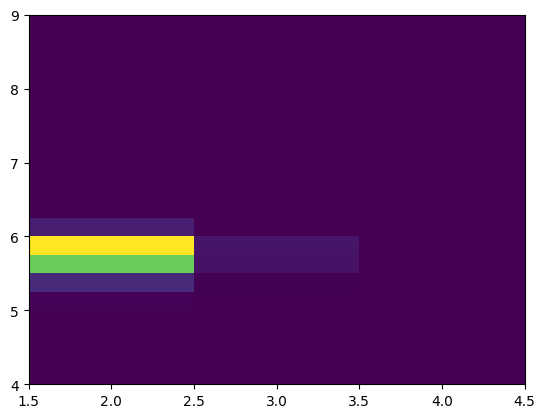

In [30]:
plt.imshow(w_all[..., 4], extent=(maps.ydegs.min()-0.5, maps.ydegs.max()+0.5, np.log10(maps.lambdas[0]), np.log10(maps.lambdas[-1])), aspect='auto', origin='lower')

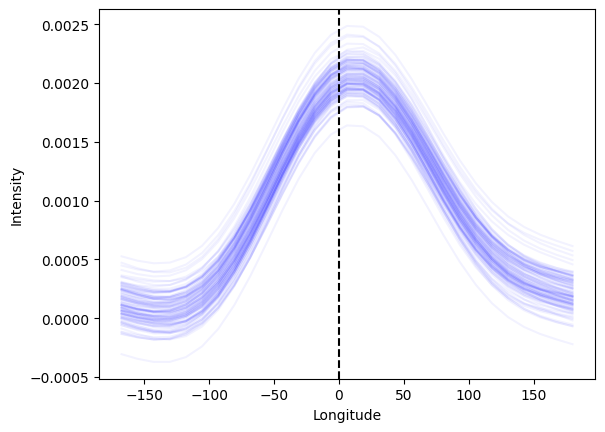

Text(0, 0.5, 'Intensity')

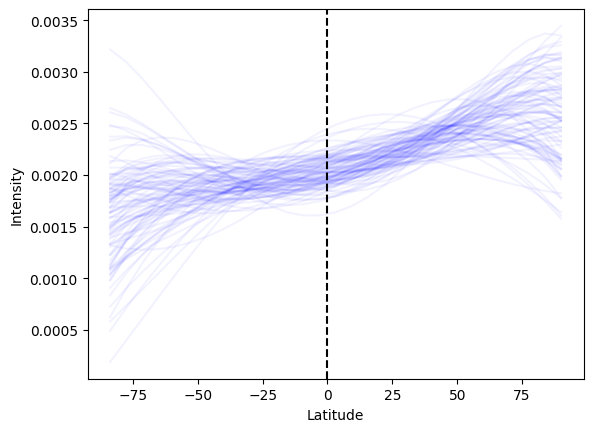

In [31]:
i_wl = 1
I_plot = I_all_wl[i_wl]
I_cov_plot = I_cov_all_wl[i_wl]

N = 100
samples = np.random.multivariate_normal(I_plot, I_cov_plot, N)

n_lat, n_lon = maps.map_res, maps.map_res
lons, lats = np.linspace(-180, 180, n_lon), np.linspace(-90, 90, n_lat)

for i in range(N):
    plt.plot(lons, expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[n_lat//2], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Longitude')
plt.ylabel('Intensity')

plt.show()
for i in range(N):
    plt.plot(lats, expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[:, n_lon//2], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Latitude')
plt.ylabel('Intensity')

-1 366
0 100
1 100
2 92
3 41
F_regionals shape: (5, 14)
F_regional_errs shape: (5, 14)
labels unique (full map): [-1  0  1  2  3]


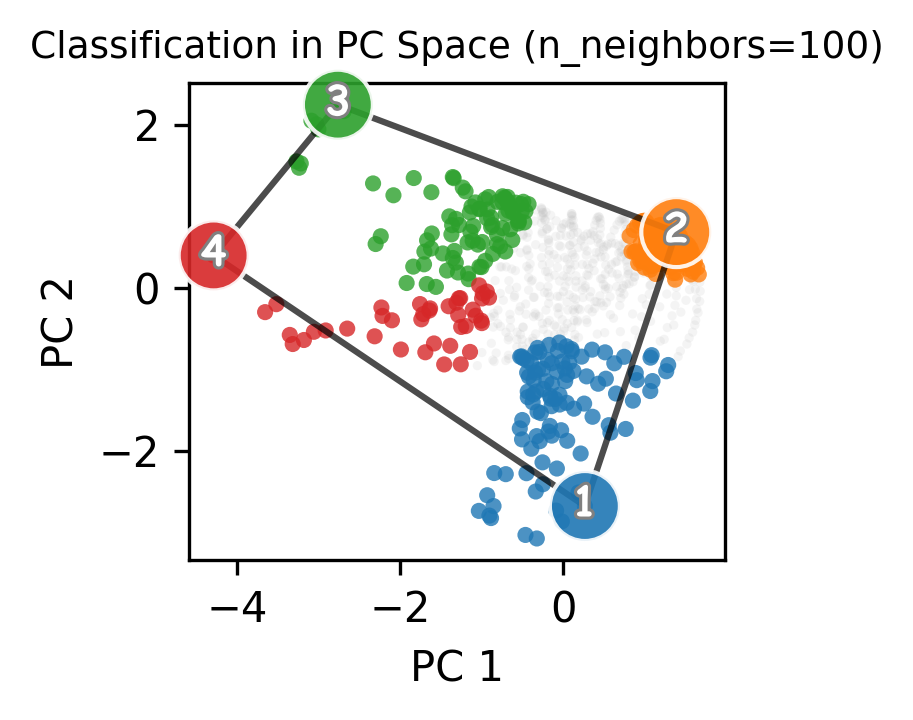

In [32]:
from spectralmap.cluster import find_clusters

amplitudes = np.ones(I_all_wl.shape[0])  # Placeholder for actual amplitude scaling per wavelength
F_all_wl = I_all_wl * amplitudes[:, None] *np.pi
F_cov_all_wl = I_cov_all_wl * (np.pi * amplitudes[:, None, None])**2
F_var_all_wl = np.diagonal(F_cov_all_wl, axis1=1, axis2=2)
F_all_wl[F_all_wl<0] = 1e-6

F_regionals, F_regional_errs, labels = find_clusters(
    F_all_wl,
    F_cov_all_wl,
    n_corners=4,
    n_neighbors=100,
 )



print('F_regionals shape:', F_regionals.shape)
print('F_regional_errs shape:', F_regional_errs.shape)
print('labels unique (full map):', np.unique(labels))

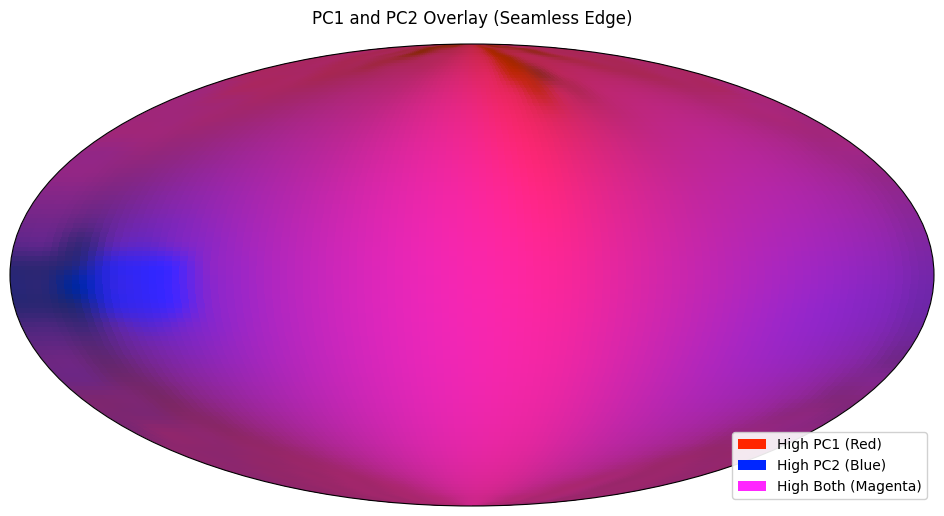

In [33]:
from sklearn.decomposition import PCA
from spectralmap.utilities import expand_moll_values, plot_mollweide_rgb_perfect_edges
pca = PCA(n_components=2)
PCs = pca.fit_transform(np.log(F_all_wl).T)  # shape: (n_wavelengths, 2)
pc1_scores = PCs[:, 0]
pc2_scores = PCs[:, 1]

mask_2d = (maps.lon > maps.observed_lon_range[0]) & (maps.lon < maps.observed_lon_range[1]) if maps.observed_lon_range is not None else maps.moll_mask

fig, ax = plot_mollweide_rgb_perfect_edges(pc1_scores, pc2_scores, mask_2d, upsample=4)
plt.show()

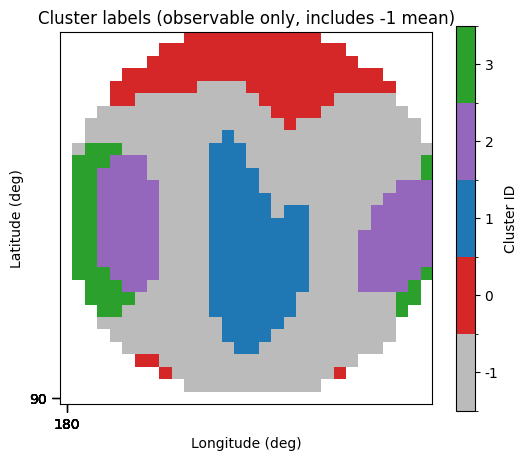

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

labels_2d = expand_moll_values(labels, maps.moll_mask_flat).reshape(30, 30)
UNOBS_LABEL = -999

# Plot ONLY observable part, but keep all observable label values (including -1)
labels_obs_flat = labels[labels != UNOBS_LABEL]
uniq = np.unique(labels_obs_flat)

# Build a display map with compact color indices; unobservable stays masked
display = np.full_like(labels_2d, fill_value=-1, dtype=int)
label_to_idx = {lab: i for i, lab in enumerate(uniq)}
for lab, idx in label_to_idx.items():
    display[labels_2d == lab] = idx

display_masked = np.ma.masked_where(display < 0, display)

cluster_colors = ['#BBBBBB', '#D62728', '#1F77B4', '#9467BD', '#2CA02C', '#FF7F0E', '#8C564B']
if len(uniq) > len(cluster_colors):
    cluster_colors = [plt.cm.tab20(i / max(len(uniq) - 1, 1)) for i in range(len(uniq))]
else:
    cluster_colors = cluster_colors[:len(uniq)]

cmap = ListedColormap(cluster_colors)
boundaries = np.arange(-0.5, len(uniq) + 0.5, 1)
norm = BoundaryNorm(boundaries, cmap.N)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(display_masked, origin='lower', cmap=cmap, norm=norm)
ax.set_title('Cluster labels (observable only, includes -1 mean)')

# Show physical coordinate labels (lon/lat) instead of pixel indices
lons_2d = maps.lon
lats_2d = maps.lat

# Symmetric major ticks
lon_major = np.array([-180, -120, -60, 0, 60, 120, 180])
lat_major = np.array([-90, -60, -30, 0, 30, 60, 90])

# Minor ticks every 30 deg
lon_minor = np.arange(-180, 181, 30)
lat_minor = np.arange(-90, 91, 30)

x_major_idx = [int(np.argmin(np.abs(lons_2d[0, :] - val))) for val in lon_major]
y_major_idx = [int(np.argmin(np.abs(lats_2d[:, 0] - val))) for val in lat_major]
x_minor_idx = [int(np.argmin(np.abs(lons_2d[0, :] - val))) for val in lon_minor]
y_minor_idx = [int(np.argmin(np.abs(lats_2d[:, 0] - val))) for val in lat_minor]

ax.set_xticks(x_major_idx)
ax.set_yticks(y_major_idx)
ax.set_xticklabels([f'{v:d}' for v in lon_major])
ax.set_yticklabels([f'{v:d}' for v in lat_major])

ax.set_xticks(x_minor_idx, minor=True)
ax.set_yticks(y_minor_idx, minor=True)
ax.tick_params(axis='both', which='major', length=6)
ax.tick_params(axis='both', which='minor', length=3)

ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')

cbar = fig.colorbar(im, ax=ax, ticks=np.arange(len(uniq)))
cbar.ax.set_yticklabels([str(int(lab)) for lab in uniq])
cbar.set_label('Cluster ID')

plt.show()

F_regionals shape: (5, 14)
F_regionals mean: 0.0034076659147828287
First three dlam: [0.5 0.5 0.5]
Tb_all shape: (5, 14)
Tb_all mean: 2744.044499409413


Text(0, 0.5, 'Brightness Temperature (K)')

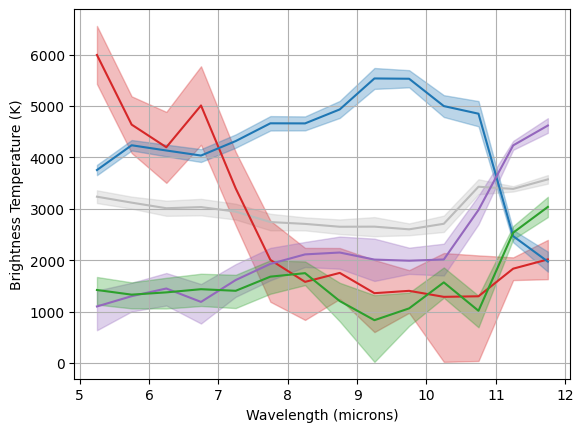

In [35]:
import numpy as np
from scipy.optimize import leastsq

# Physical Constants
c = 2.998e8   # Speed of light values from ExFig3.py
h = 6.626e-34 # Planck constant
kb = 1.381e-23 # Boltzmann constant

# Load throughput data once globally to avoid reading file in loops
try:
    throughput_data = np.loadtxt('../eigenspectra/ExFig3/niriss_order1.txt')
except OSError:
    print("Warning: Throughput file not found. Ensure path is correct.")
    throughput_data = None

def planck_radiance(wavelength_microns, temperature):
    """Calculates Blackbody radiance B_lambda in W/m^2/sr/m"""
    waves_m = wavelength_microns * 1e-6
    # Planck's Law
    bb = (2 * h * c**2 / waves_m**5) / (np.exp(h * c / (waves_m * kb * temperature)) - 1)
    return bb

def integrate_throughput(wavelength_microns, spectrum, throughput):
    """Integrates a spectrum over a bandpass defined by throughput."""
    # Normalize throughput to calculate the weighted mean flux
    denom = np.trapz(throughput, wavelength_microns)
    if not np.isfinite(denom) or np.isclose(denom, 0.0):
        return np.nan
    norm_throughput = throughput / denom
    integrated_val = np.trapz(spectrum * norm_throughput, wavelength_microns)
    return integrated_val

def calc_instrument_throughput(waves):
    """Interpolates throughput to given wavelengths using pre-loaded data."""
    if throughput_data is None:
        # Fallback or error if data not loaded
        return np.ones_like(waves)
    return np.interp(waves, throughput_data[:,0], throughput_data[:,1])

def residuals(T, target_radiance, wavelength_grid, throughput):
    """Residual function for the optimizer."""
    model_flux = planck_radiance(wavelength_grid, T)
    model_integrated = integrate_throughput(wavelength_grid, model_flux, throughput)
    return target_radiance - model_integrated

def compute_bin_widths_from_centers(central_waves):
    """Compute non-zero bin widths from bin centers using midpoint edges."""
    central_waves = np.asarray(central_waves)
    if central_waves.size < 2:
        return np.array([1e-6], dtype=float)
    edges = np.empty(central_waves.size + 1, dtype=float)
    edges[1:-1] = 0.5 * (central_waves[:-1] + central_waves[1:])
    edges[0] = central_waves[0] - 0.5 * (central_waves[1] - central_waves[0])
    edges[-1] = central_waves[-1] + 0.5 * (central_waves[-1] - central_waves[-2])
    widths = np.diff(edges)
    widths = np.where(widths > 0, widths, np.min(widths[widths > 0]))
    return widths

def eclipse_depth_to_brightness_temp(central_waves, bin_widths, eclipse_depth, r_p_r_s, T_star=6400.0):
    """
    Converts Eclipse Depth to Brightness Temperature element-wise.
    Optimized to pre-calculate grid integrations per wavelength bin.
    """
    
    eclipse_depth = np.asarray(eclipse_depth)
    central_waves = np.atleast_1d(central_waves)
    bin_widths = np.atleast_1d(bin_widths)
    
    temps = np.zeros_like(eclipse_depth)
    initial_guess = [2500.0]
    
    n_waves = len(central_waves)
    
    # Case 1: Multiple spectra (Regions x Wavelengths)
    if eclipse_depth.ndim == 2:
        n_regions = eclipse_depth.shape[0]
        # Iterate over wavelengths (outer loop)
        for i_wav in range(n_waves):
            cw = central_waves[i_wav]
            dw = bin_widths[i_wav]
            
            # --- Pre-calculation for this bin ---
            wave_grid = np.linspace(cw - dw/2.0, cw + dw/2.0, 1000)
            throughput_grid = calc_instrument_throughput(wave_grid)
            
            star_bb = planck_radiance(wave_grid, T_star)
            star_int = integrate_throughput(wave_grid, star_bb, throughput_grid)
            # ------------------------------------

            # Iterate over regions (inner loop) - only solving remains
            for i_reg in range(n_regions):
                depth = eclipse_depth[i_reg, i_wav]
                planet_int = star_int * depth / r_p_r_s**2
                if not np.isfinite(planet_int):
                    temps[i_reg, i_wav] = np.nan
                    continue

                res = leastsq(residuals, initial_guess, args=(planet_int, wave_grid, throughput_grid))
                temps[i_reg, i_wav] = res[0][0]
                
    # Case 2: Single spectrum (Wavelengths only)
    elif eclipse_depth.ndim == 1:
        for i_wav in range(n_waves):
            cw = central_waves[i_wav]
            dw = bin_widths[i_wav]
            depth = eclipse_depth[i_wav]
            
            wave_grid = np.linspace(cw - dw/2.0, cw + dw/2.0, 1000)
            throughput_grid = calc_instrument_throughput(wave_grid)
            
            star_bb = planck_radiance(wave_grid, T_star)
            star_int = integrate_throughput(wave_grid, star_bb, throughput_grid)
            
            planet_int = star_int * depth / r_p_r_s**2
            if not np.isfinite(planet_int):
                temps[i_wav] = np.nan
                continue
            
            res = leastsq(residuals, initial_guess, args=(planet_int, wave_grid, throughput_grid))
            temps[i_wav] = res[0][0]
            
    # Case 3: Scalar
    else:
        cw = central_waves[0]
        dw = bin_widths[0]
        depth = eclipse_depth
        wave_grid = np.linspace(cw - dw/2.0, cw + dw/2.0, 1000)
        throughput_grid = calc_instrument_throughput(wave_grid)
        star_bb = planck_radiance(wave_grid, T_star)
        star_int = integrate_throughput(wave_grid, star_bb, throughput_grid)
        planet_int = star_int * depth / r_p_r_s**2
        if not np.isfinite(planet_int):
            return np.nan
        res = leastsq(residuals, initial_guess, args=(planet_int, wave_grid, throughput_grid))
        return res[0][0]

    return temps

# --- Example Usage ---
RpRs = 0.09783 # From ExFig3.py
print("F_regionals shape:", F_regionals.shape)
print("F_regionals mean:", np.mean(F_regionals))

# Fix applied: Convert Starry Intensity to Eclipse Depth (Flux)
# Starry Intensity I integrates to Flux F = pi * I on the unit disk
# The conversion function expects Flux (Eclipse Depth), so we multiply by pi.
dlam = compute_bin_widths_from_centers(wl)
print("First three dlam:", dlam[:3])
Tb_all = eclipse_depth_to_brightness_temp(wl, dlam, F_regionals, RpRs)
Tb_upper_all = eclipse_depth_to_brightness_temp(wl, dlam, (F_regionals + F_regional_errs), RpRs)
Tb_lower_all = eclipse_depth_to_brightness_temp(wl, dlam, (F_regionals - F_regional_errs), RpRs)
print("Tb_all shape:", Tb_all.shape)
print("Tb_all mean:", np.mean(Tb_all))
base_colors = ['#BBBBBB', '#D62728', '#1F77B4', '#9467BD', '#2CA02C', '#FF7F0E', '#8C564B']
for i in range(len(Tb_all)):
    plt.plot(wl, Tb_all[i], color=base_colors[i % len(base_colors)], label=f'Region {i+1}')
    plt.fill_between(wl, Tb_lower_all[i], Tb_upper_all[i], color=base_colors[i % len(base_colors)], alpha=0.3)
plt.grid()
plt.xlabel('Wavelength (microns)')
plt.ylabel('Brightness Temperature (K)')

In [36]:
# Prior on primary
pri_mu = np.zeros(pri.map.Ny)
pri_mu[0] = 1.0
pri_L = np.zeros(pri.map.Ny)
pri_L[0] = 1e-10
pri_L[1:] = 1e-10
pri.map.set_prior(mu=pri_mu, L=pri_L)

# Prior on secondary
sec_mu = np.zeros(sec.map.Ny)
sec_mu[0] = 0.001
sec_L = np.zeros(sec.map.Ny)
sec_L[0] = 1e-1
sec_L[1:] = 1e-1
sec.map.set_prior(mu=sec_mu, L=sec_L)

In [22]:
sys = starry.System(pri, sec)

In [23]:
sys.set_data(flux=flux_white, C=flux_err_white[:] ** 2)
mu, cho_cov = sys.solve(t=time)
flux_fit = sys.flux(time)

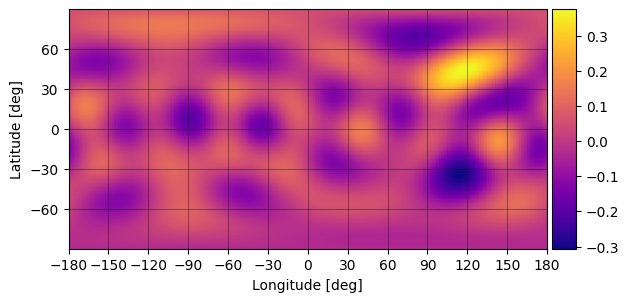

In [24]:
sec.map.show(projection='rect', colorbar=True)

In [25]:
# sys.show(t=time, window_pad=2,figsize=(5, 5),interval=10)

Text(0.5, 1.0, 'White Light Curve Fit')

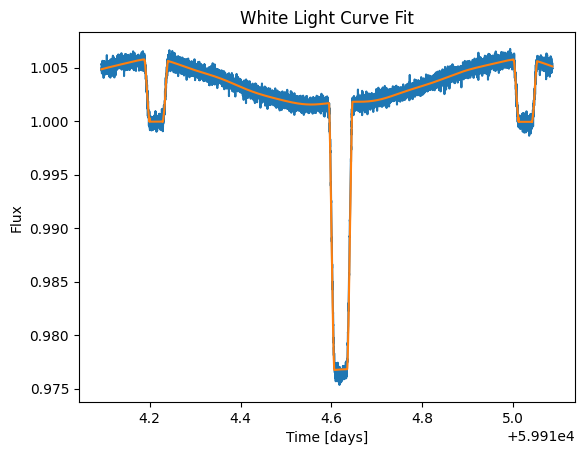

In [26]:
import matplotlib.pyplot as plt
plt.plot(time, flux_white)
plt.plot(time, flux_fit)
plt.ylabel('Flux')
plt.xlabel('Time [days]')
plt.title(f'White Light Curve Fit')